# Project: TMDb Dataset Analysis 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusion">Conclusion</a></li>
<li><a href="#limitation">Limitation</a></li>
</ul>

<a id='intro'></a>
## Introduction 

> This project involves the investigation of the TMDb movie data set. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), spanning a period from 1960 till 2015, including user ratings and revenue

### Dataset Description

<ul>
<li>id - Row id of each entry</li>
<li>popularity - Measure of movie popularity</li>
<li>budget - Budget used in producing the movie</li>
<li>revenue - Amount earned from the movie</li>
<li>original_title - Movie title</li>
<li>cast - Main cast</li>
<li>homepage - Movie url link</li>
<li>director - Movie director</li>
<li>tagline - MOvie tagline</li>
<li>keywords - Movie keywords</li>
<li>overview - Movie synopsis</li>
<li>runtime - Movie duration</li>
<li>genres - Movie genre(s)</li>
<li>production_companies - Companies that produced the movie</li>
<li>release_date - Movie release date</li>
<li>vote_count - Count of people who voted on the movie</li>
<li>vote_average - Average vote for movie</li>
<li>release_year - Movie release year</li>
<li>budget_adj - Movie budget in terms of 2010 dollars</li>
<li>revenue_adj - Movie revenue in terms of 2010 dollars</li>
</ul> 


### Questions for Analysis

> **1**: What is the total adjusted profit made per genre and how do they compare to the number of movies made (per genre)?
>>This analysis will be done by plotting graphs of the genres against their total adjusted profits, as well as against the counts of movies made

> **2**: What kinds of properties are associated with the movies per decade?
>>This analysis will be done by plotting graphs of the decades against various features like the average votes, adjusted profits, adjusted revenuesand adjusted budgets 

> **3**: Which genres are most popular from year to year?
>>This analysis will be done by plotting graph the total popularity per genre for each decade and analysing the genres that have the highest popularities per decade

> **4**: What are the top 5 and least 5 movies in terms of adjusted profit and average votes? Do the highest and lowest profitable movies have the highest and lowest average votes respectively?
>>This analysis will be done by plotting the graphs of the top 5 and least 5 movies for each feature and comparing their outputs

<a id='wrangling'></a>
## Data Wrangling

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
# Load data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.


df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# view the shape of the data frame

df.shape

(10866, 21)

In [4]:
# view the info of the data frame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
# view the summary statistics of the data frame

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## Certain columns would not aid in the exploration of the data. These columns are to be dropped

In [6]:
## drop irrelevant columns

df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview'], axis = 1, inplace = True)

In [7]:
# confirm columns have been dropped

df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [8]:
# check new data set info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   cast                  10790 non-null  object 
 5   director              10822 non-null  object 
 6   runtime               10866 non-null  int64  
 7   genres                10843 non-null  object 
 8   production_companies  9836 non-null   object 
 9   release_date          10866 non-null  object 
 10  vote_count            10866 non-null  int64  
 11  vote_average          10866 non-null  float64
 12  release_year          10866 non-null  int64  
 13  budget_adj            10866 non-null  float64
 14  revenue_adj           10866 non-null  float64
dtypes: float64(4), int6

In [9]:
# check count of rows with missing values

df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


### Data Cleaning


## Determine the percentage of null rows per affected columns over the total rows

In [10]:
# percentage of null rows per affected columns over the total rows

columns = ['cast', 'director', 'genres', 'production_companies']
for column in columns:
    percent_null = df[column].isnull().sum() / len(df)
    print('The missing values of {} constitute {:,.2%} of the entire dataset'.format(column, percent_null))

The missing values of cast constitute 0.70% of the entire dataset
The missing values of director constitute 0.40% of the entire dataset
The missing values of genres constitute 0.21% of the entire dataset
The missing values of production_companies constitute 9.48% of the entire dataset


### Due to the missing values of production_companies constituting almost 10% of the entire dataset, the column would be dropped. Since the missing values of cast, director and genres columns are less than 1% each of the entire dataset, the affected rows would be dropped instead.

In [11]:
# drop production companies column

df.drop(['production_companies'], axis = 1, inplace = True)

In [12]:
# drop rows with null values

df.dropna(inplace = True)

In [13]:
# confirm changes have been made

df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [14]:
# confirm there are no null values

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10732 non-null  float64
 1   budget          10732 non-null  int64  
 2   revenue         10732 non-null  int64  
 3   original_title  10732 non-null  object 
 4   cast            10732 non-null  object 
 5   director        10732 non-null  object 
 6   runtime         10732 non-null  int64  
 7   genres          10732 non-null  object 
 8   release_date    10732 non-null  object 
 9   vote_count      10732 non-null  int64  
 10  vote_average    10732 non-null  float64
 11  release_year    10732 non-null  int64  
 12  budget_adj      10732 non-null  float64
 13  revenue_adj     10732 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


In [15]:
## check for duplicates

df.duplicated().sum()

1

In [16]:
# drop duplicate

df.drop_duplicates(inplace = True)

In [17]:
## confirm drop of duplicate

df.duplicated().sum()

0

## The 'genres' column contains multiple values separated by pipe (|) characters. To be able to explore the data in the column, each row has to be split using the pipe character, with each genre forminig an entirely new row in the dataset 

In [18]:
# create a 'genre_no' column that shows the number of genres per movie

df['genre_no'] = df['genres'].apply(lambda x: len(x.split("|")))

In [19]:
# view the top 5 rows of the data

df['genre_no'].head()

0    4
1    4
2    3
3    4
4    3
Name: genre_no, dtype: int64

In [20]:
# confirm each movie has at least one genre

np.min(df['genre_no'])

1

In [21]:
# view the counts of movies per genre_no
df['genre_no'].value_counts()

2    3409
3    3079
1    2271
4    1433
5     539
Name: genre_no, dtype: int64

### Break down the dataset into five data frames based on the length of their genres. The genre in each data frame should be equal to or greater than the length of the genres to avoid an out of range indexing error

In [22]:
# create five new data frames

[df1, df2, df3, df4, df5] = [df[df['genre_no'] >= length] for length in range(1,6)]

### Split the genres using the pipe operator and index the split by the length of the genres to return a singular genre

In [23]:
df1['genres'] = df1['genres'].apply(lambda x: x.split("|")[0])
df2['genres'] = df2['genres'].apply(lambda x: x.split("|")[1])
df3['genres'] = df3['genres'].apply(lambda x: x.split("|")[2])
df4['genres'] = df4['genres'].apply(lambda x: x.split("|")[3])
df5['genres'] = df5['genres'].apply(lambda x: x.split("|")[4])

### Append all five dataframes to create a newly consolidated dataframe

In [24]:
new_df = df1.append([df2, df3, df4, df5])

In [25]:
## confirm there are no new duplicates

new_df.duplicated().sum()

0

In [26]:
## reset the index so as to have a chronological order

new_df.reset_index(drop = True, inplace = True)

In [27]:
# view the new unique genres in the data set

new_df['genres'].unique()

array(['Action', 'Adventure', 'Western', 'Science Fiction', 'Drama',
       'Family', 'Comedy', 'Crime', 'Romance', 'War', 'Mystery',
       'Thriller', 'Fantasy', 'History', 'Animation', 'Horror', 'Music',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

<a id='eda'></a>
## Exploratory Data Analysis

### Before answering the questions, create a new column for adjusted profit (adjusted revenue minus adjusted budget), to determine the actual profit made from the movies.

In [28]:
# include 'profit_adj' column

new_df['profit_adj'] = new_df['revenue_adj'] - new_df['budget_adj']

### Create another column to represent the decades in which the movies were made

In [29]:
## check for the lowest year in the dataset

np.min(new_df['release_year'])

1960

In [30]:
## check for the highest year in the dataset

np.max(new_df['release_year'])

2015

In [31]:
# Bin edges that will be used to "cut" the data into groups

bin_edges = [1959, 1969, 1979, 1989, 1999, 2009, 2015]

In [32]:
# Labels for the decades
bin_names = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s']

In [33]:
# Create decade column
new_df['decade'] = pd.cut(new_df['release_year'], bin_edges, labels=bin_names)

# Check for successful creation of this column
new_df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre_no,profit_adj,decade
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,4,1.254446e+09,2010s
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,4,2.101614e+08,2010s
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,3,1.704191e+08,2010s
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,4,1.718723e+09,2010s
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,3,1.210949e+09,2010s


### Plot histograms of the continuous features in the df dataframe (before genre breakdown)

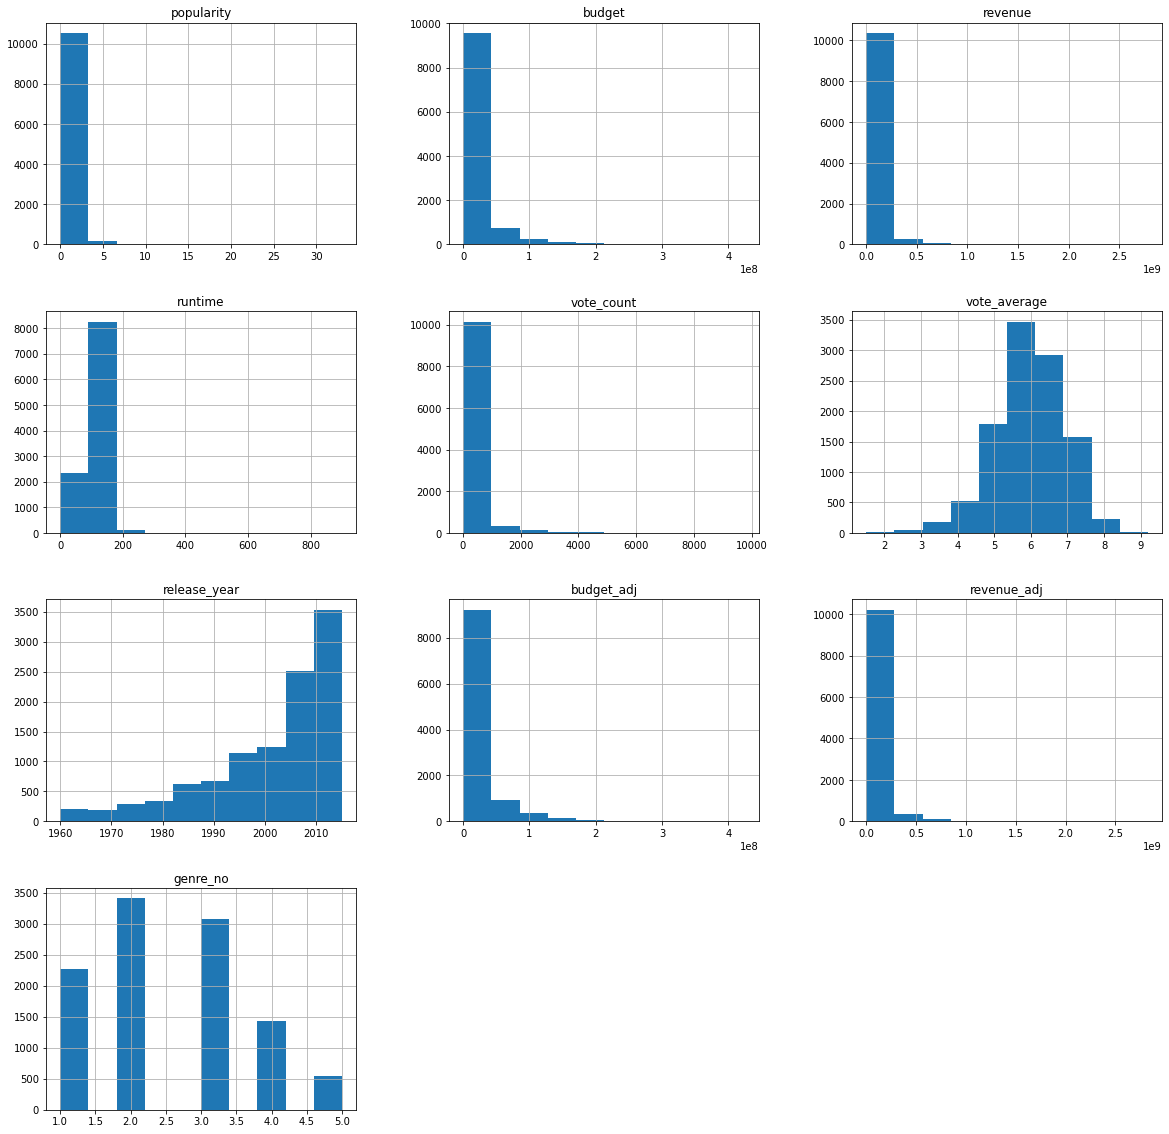

In [34]:
df.hist(figsize = (20,20));

### The statements below are the observations from the plot of histograms

> The histograms for budget, adjusted budget, revenue and adjusted revenue are all skewed to the right, showing that most movies fall within the same ranges, while very few movies go beyond the usual range.

> The popularity histogram shows that most movies have popularities of about 3 or less

> Most movies have vote counts of at least 1000

> The average votes are uniformly distributed, with about 3,500 movies having average votes within 5.3 and 6.1

> The number of movies being produced over the years have had a gradual increase

> Just over 2,000 movies have runtimes of 100 minutes and below while other movies have runtimes above 100 minutes

### Research Question 1 (What is the total adjusted profit made per genre and how do they compare to the total number of movies made (per genre)?)

In [35]:
## group new_df by the genres column and compute aggregations on the grouped data

genre_stats = new_df.groupby('genres')['profit_adj'].agg(['mean', 'count', 'sum', 'max'])
genre_stats

,mean,count,sum,max
genres,,,,
Action,5.899614e+07,2376,1.401748e+11,2.750137e+09
Adventure,9.813818e+07,1465,1.437724e+11,2.750137e+09
Animation,6.312534e+07,664,4.191522e+10,1.545635e+09
Comedy,3.212861e+07,3775,1.212855e+11,1.545635e+09
Crime,3.512884e+07,1353,4.752932e+10,1.551568e+09
Documentary,1.789833e+06,470,8.412215e+08,1.305845e+08
Drama,2.563976e+07,4746,1.216863e+11,2.234714e+09
Family,6.167303e+07,1214,7.487105e+10,1.767968e+09
Fantasy,7.446025e+07,908,6.760991e+10,2.586237e+09


### Plot a bar chart to show the total adjusted profit per genre over all the entries in the data set

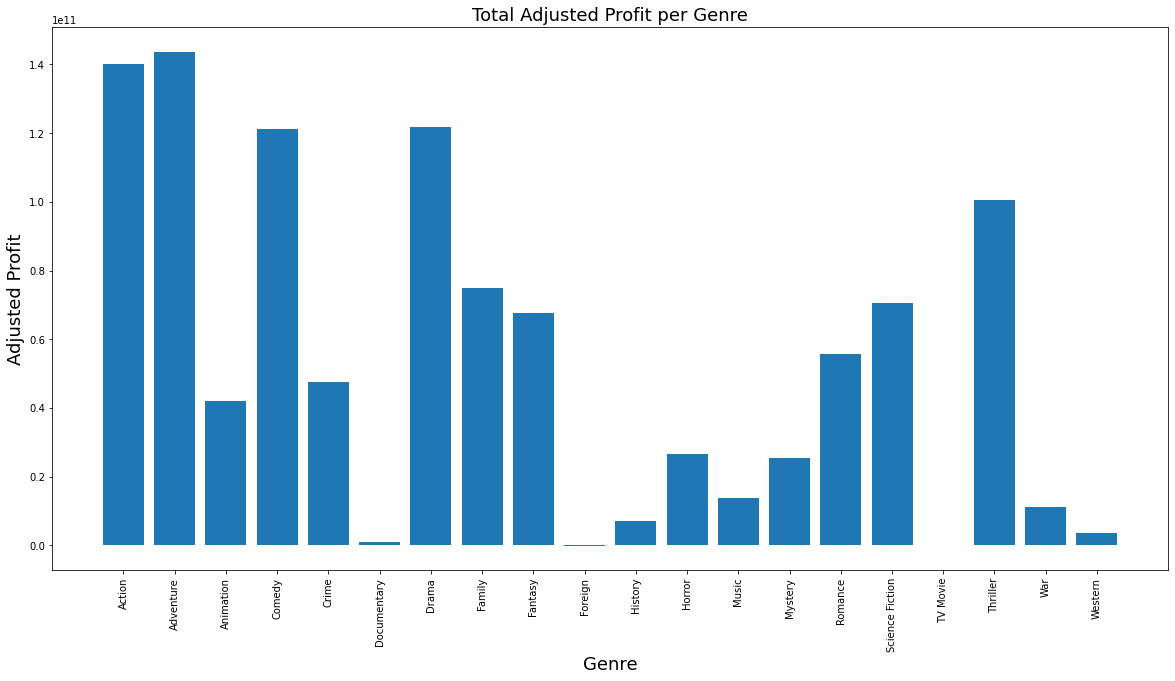

In [36]:
plt.figure(figsize=(20, 10))
plt.bar(genre_stats.index, genre_stats['sum'])
plt.title('Total Adjusted Profit per Genre', fontsize=18)
plt.xlabel('Genre', fontsize=18)
plt.ylabel('Adjusted Profit', fontsize=18)
plt.xticks(rotation='vertical');

> The bar chart shows that Adventure is the most profitable genre, closely followed by Action. Foreign movies on average incur loses, while TV Movies and Documentaries have made little or no profits on average. Understandably, they are not thriving genre for movies, as fewer people watch them.

### Plot a bar chart to show the total count of movies per genre over all the entries in the data set, in order to compare/analyse if the higher profitable genres are due to higher counts in the number of genre movies

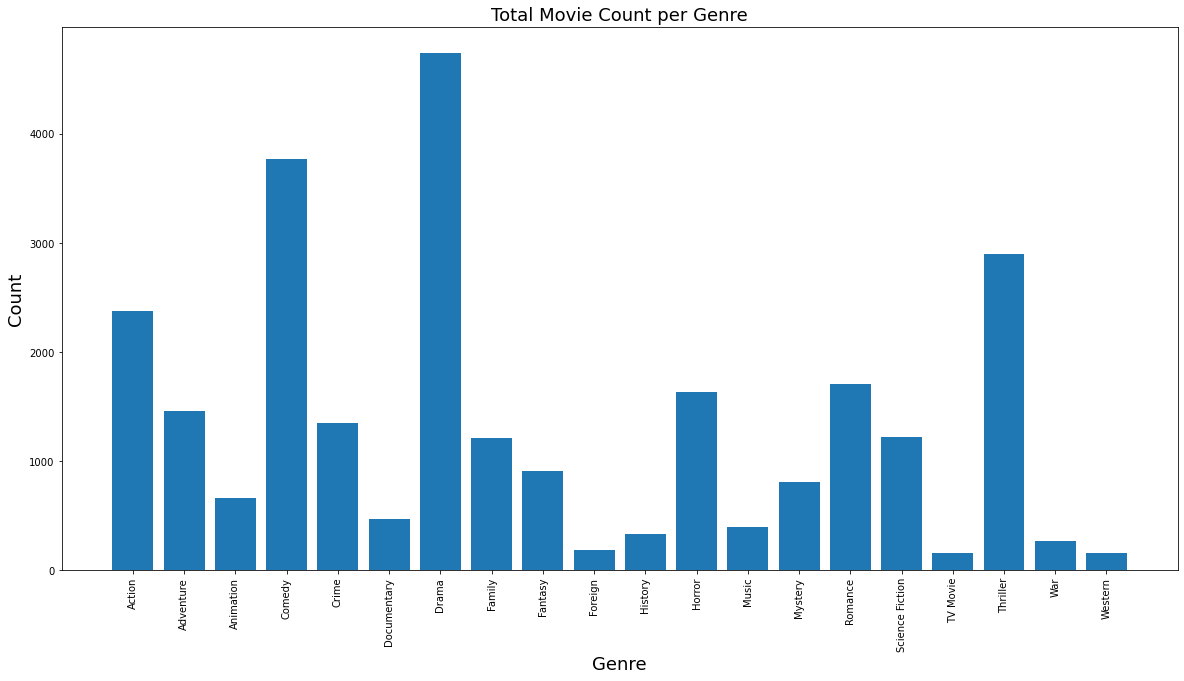

In [37]:
plt.figure(figsize=(20, 10))
plt.bar(genre_stats.index, genre_stats['count'])
plt.title('Total Movie Count per Genre', fontsize=18)
plt.xlabel('Genre', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(rotation='vertical');

> In comparison to the adjusted profit histogram above, the Drama genre has the highest count of movies over the years, followed by the Comedy genre. Foreign, TV Movies and Documentaries generally have low counts.

> On the other hand, the Adventure genre has the seventh highest count of movies, inferring that the high profits are not due to the counts and that viewers just generally like adventures

### Plot histograms of the Foreign and TV Movies genres to analyse the reasons for their negative adjusted profits

count    1.840000e+02
mean    -6.273833e+05
std      1.319477e+07
min     -1.404092e+08
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.775543e+07
Name: profit_adj, dtype: float64

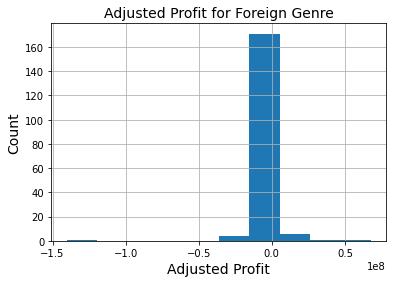

In [38]:
Foreign = new_df[new_df['genres'] == 'Foreign']
Foreign['profit_adj'].hist()
plt.title('Adjusted Profit for Foreign Genre', fontsize=14)
plt.xlabel('Adjusted Profit', fontsize=14)
plt.ylabel('Count', fontsize=14);
Foreign['profit_adj'].describe()

count    1.620000e+02
mean     5.526858e+04
std      4.330646e+06
min     -1.219681e+07
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.143802e+07
Name: profit_adj, dtype: float64

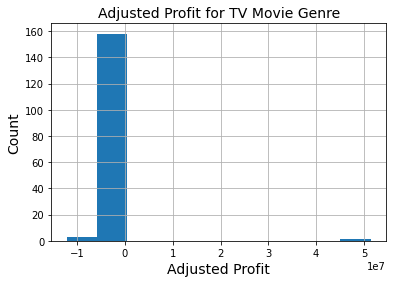

In [39]:
TV = new_df[new_df['genres'] == 'TV Movie']
TV['profit_adj'].hist()
plt.title('Adjusted Profit for TV Movie Genre', fontsize=14)
plt.xlabel('Adjusted Profit', fontsize=14)
plt.ylabel('Count', fontsize=14);
TV['profit_adj'].describe()

> The above Foreign and TV Movie histograms show that most of the movies produced had negative adjusted profits

> Both genres also had outliers with positive profits, which explains the high maximum profits seen from running describe()

### Research Question 2  (What kinds of properties are associated with the movies per decade?)

### Plot a bar chart to show the average votes per decade

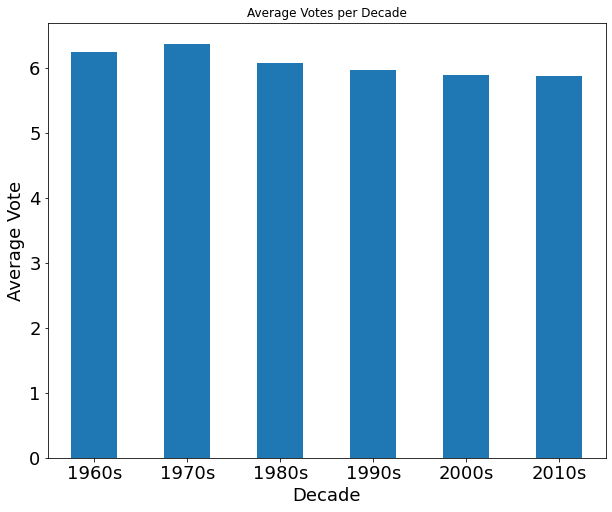

In [40]:
plt.figure(figsize=(10, 8))
new_df.groupby('decade')['vote_average'].mean().plot(kind='bar', title='Average Votes per Decade', fontsize=18)
plt.xlabel('Decade', fontsize=18)
plt.ylabel('Average Vote', fontsize=18)
plt.xticks(rotation='horizontal');

>The graph above shows that the 1970s had the highest average votes by viewers

### Plot a bar chart to show the average adjusted profit per decade

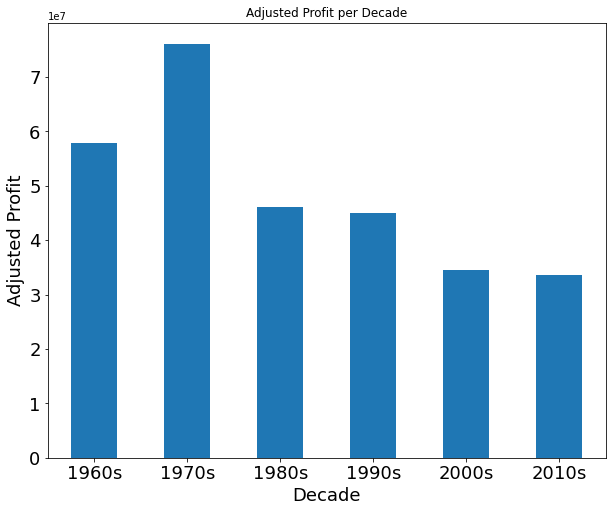

In [41]:
plt.figure(figsize=(10, 8))
new_df.groupby('decade')['profit_adj'].mean().plot(kind='bar', title='Adjusted Profit per Decade', fontsize=18)
plt.xlabel('Decade', fontsize=18)
plt.ylabel('Adjusted Profit', fontsize=18)
plt.xticks(rotation='horizontal');

>The graph above shows that the 1970s had the highest adjusted profits

### Plot a bar chart to show the average adjusted revenue per decade

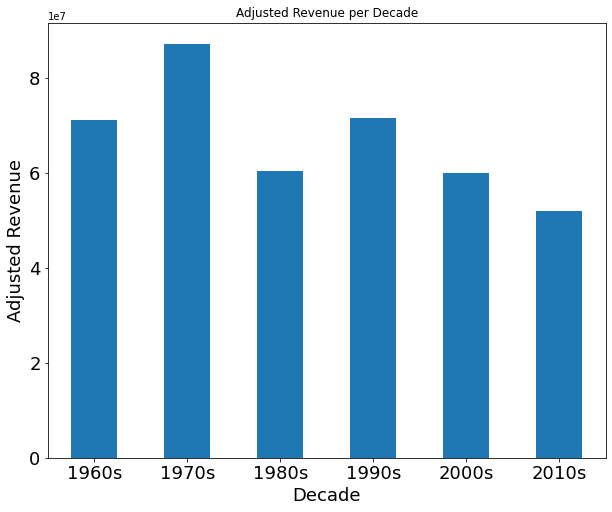

In [42]:
plt.figure(figsize=(10, 8))
new_df.groupby('decade')['revenue_adj'].mean().plot(kind='bar', title='Adjusted Revenue per Decade', fontsize=18)
plt.xlabel('Decade', fontsize=18)
plt.ylabel('Adjusted Revenue', fontsize=18)
plt.xticks(rotation='horizontal');

>The graph above shows that the 1970s had the highest adjusted revenues

### Plot a bar chart to show the average adjusted budget per decade

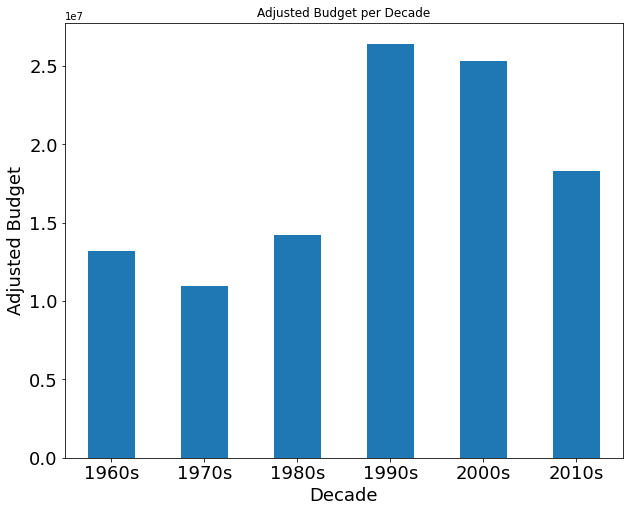

In [43]:
plt.figure(figsize=(10, 8))
new_df.groupby('decade')['budget_adj'].mean().plot(kind='bar', title='Adjusted Budget per Decade', fontsize=18)
plt.xlabel('Decade', fontsize=18)
plt.ylabel('Adjusted Budget', fontsize=18)
plt.xticks(rotation='horizontal');

>The graph above shows that the 1970s had the lowest adjusted budgets which is a good sign, considering the higher values they had in other categories

### Research Question 3  (Which genres are most popular from year to year?)

#### Group new_df by decade and genres and compute the total sum of the popularities per decade and genre

In [44]:
popular = new_df.groupby(['decade', 'genres'])['popularity'].agg('sum')
popular

decade  genres         
1960s   Action              41.238437
        Adventure           46.677670
        Animation           12.393190
        Comedy              46.260995
        Crime               20.421047
                              ...    
2010s   Science Fiction    552.923076
        TV Movie            20.856959
        Thriller           878.294147
        War                 65.299059
        Western             39.918507
Name: popularity, Length: 120, dtype: float64

#### Convert grouped data into a dataframe

In [45]:
popular = pd.DataFrame(popular.reset_index())

#### Do a second groupby to determine the maximum popularities per decade

In [46]:
popular.groupby(['decade'])['popularity'].max()

decade
1960s      67.592108
1970s     112.081094
1980s     217.699237
1990s     501.538735
2000s     890.811363
2010s    1048.386026
Name: popularity, dtype: float64

#### Determine the indexes of the most popular genres

In [47]:
max_ids = popular.groupby(['decade'])['popularity'].idxmax()
max_ids

decade
1960s      6
1970s     26
1980s     43
1990s     66
2000s     86
2010s    106
Name: popularity, dtype: int64

#### Use the indexes to determone the most popular genres per decade

In [48]:
most_popular = popular.iloc[max_ids]
most_popular

,decade,genres,popularity
6,1960s,Drama,67.592108
26,1970s,Drama,112.081094
43,1980s,Comedy,217.699237
66,1990s,Drama,501.538735
86,2000s,Drama,890.811363
106,2010s,Drama,1048.386026


#### Create a axis labels for the bar chart

In [49]:
labels = []
for decade, genre in zip(most_popular['decade'], most_popular['genres']):
    labels.append(str(decade + ': ' + genre))
    
labels

['1960s: Drama',
 '1970s: Drama',
 '1980s: Comedy',
 '1990s: Drama',
 '2000s: Drama',
 '2010s: Drama']

### Plot a bar chart to show the most popular genres per decade

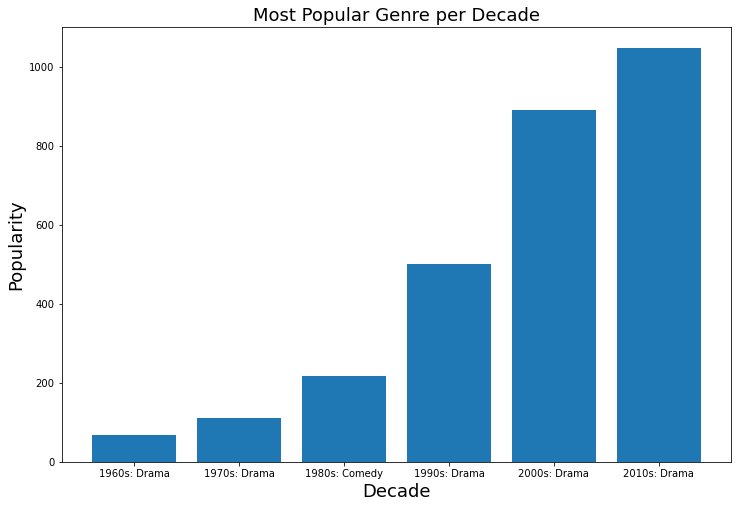

In [50]:
plt.figure(figsize=(12, 8))
plt.bar(most_popular['decade'], most_popular['popularity'], tick_label = labels);
plt.title('Most Popular Genre per Decade', fontsize=18)
plt.xlabel('Decade', fontsize=18)
plt.ylabel('Popularity', fontsize=18);

>The chart above shows that Drama genre has been the most popular genre for all the years, with a single exception in the 1980s, where the Comedy genre trumped the Drama genre by a small margin

### Analyse the 1980s data to check the popularity of the Drama genre. This is to check why it was not the most popular genre in the 1980s, noting that it had been the most popular genre in all other decades

#### Filter the popular dataframe by the 1980s decade

In [51]:
popularity_1980 = popular[popular['decade'] == '1980s']

### Plot a bar chart to show the genre popularities in the 1980s

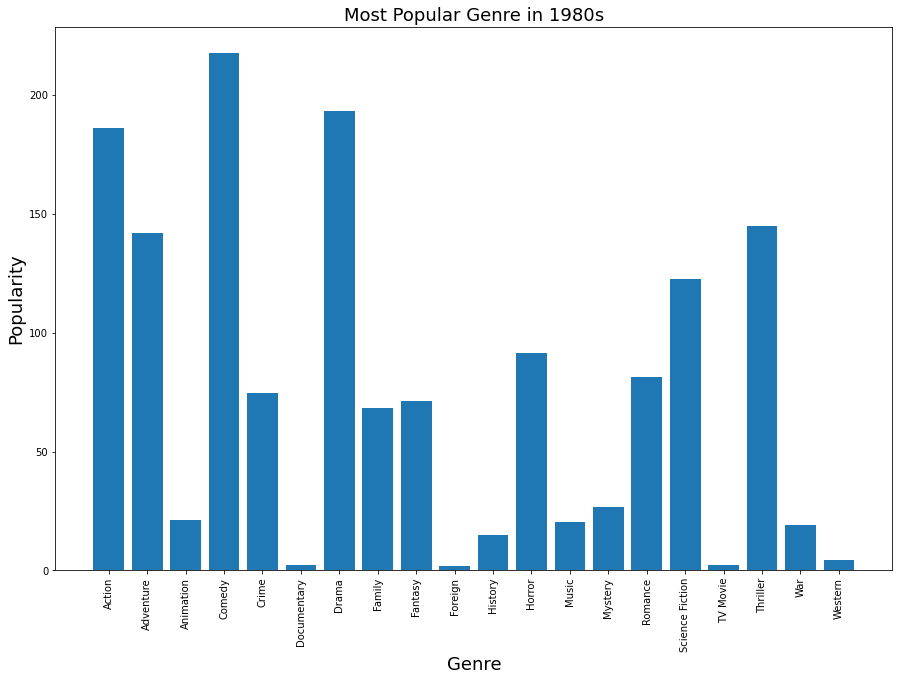

In [52]:
plt.figure(figsize=(15, 10))
plt.bar(popularity_1980['genres'], popularity_1980['popularity'])
plt.title('Most Popular Genre in 1980s', fontsize=18)
plt.xlabel('Genre', fontsize=18)
plt.ylabel('Popularity', fontsize=18)
plt.xticks(rotation='vertical');

>The bar chart above shows that Drama had the second highest popularity in the 1980s and was not far off from Comedy, which had the highest popularity

### Research Question 4 (What are the top 5 and least 5 movies in terms of adjusted profit and average votes?)

### Note that the analysis below has to be performed on the dataset that was cleaned before breaking down the genres to avoid duplicates. Hence, add an adjusted profit column to df

In [53]:
# include 'profit_adj' column in original df data frame

df['profit_adj'] = df['revenue_adj'] - df['budget_adj']

### Plot a bar chart to show the top and least 5 profitable movies ever

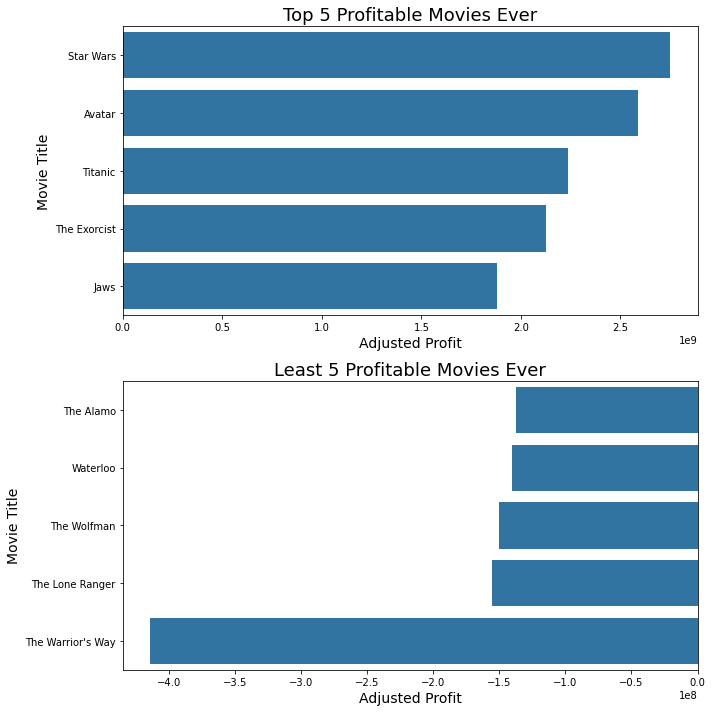

In [54]:
## determine the top and least 5 profitable movies ever

base_color = sns.color_palette()[0]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 10))

sns.barplot(x = 'profit_adj', y = 'original_title', data = df.sort_values(by = 'profit_adj', ascending = False).head(5), color = base_color, ax = ax1)
ax1.set_title('Top 5 Profitable Movies Ever', fontsize=18)
ax1.set_xlabel('Adjusted Profit', fontsize=14)
ax1.set_ylabel('Movie Title', fontsize=14);


sns.barplot(x = 'profit_adj', y = 'original_title', data = df.sort_values(by = 'profit_adj', ascending = False).tail(5), color = base_color, ax = ax2)
ax2.set_title('Least 5 Profitable Movies Ever', fontsize=18)
ax2.set_xlabel('Adjusted Profit', fontsize=14)
ax2.set_ylabel('Movie Title', fontsize=14);

fig.tight_layout()

>The above plots show that the Star Wars is the most profitable movie till date while The Warrior's Way incurred the highest loss

### Analyse the profits in the above plots by showing their actual values of adjusted budget, revenue and profits

#### View the actual adjusted budget, revenue and profits for the top 5 profitable movies

In [55]:
(df.sort_values(by=['profit_adj'], ascending = False).loc[:,['original_title', 'budget_adj', 'revenue_adj', 'profit_adj']]).head()

,original_title,budget_adj,revenue_adj,profit_adj
1329,Star Wars,3.957559e+07,2.789712e+09,2.750137e+09
1386,Avatar,2.408869e+08,2.827124e+09,2.586237e+09
5231,Titanic,2.716921e+08,2.506406e+09,2.234714e+09
10594,The Exorcist,3.928928e+07,2.167325e+09,2.128036e+09
9806,Jaws,2.836275e+07,1.907006e+09,1.878643e+09


#### View the actual adjusted budget, revenue and profits for the bottom 5 profitable movies

In [56]:
(df.sort_values(by=['profit_adj']).loc[:,['original_title', 'budget_adj', 'revenue_adj', 'profit_adj']]).head()

,original_title,budget_adj,revenue_adj,profit_adj
2244,The Warrior's Way,4.250000e+08,1.108757e+07,-4.139124e+08
5508,The Lone Ranger,2.386885e+08,8.357833e+07,-1.551102e+08
2069,The Wolfman,1.500000e+08,0.000000e+00,-1.500000e+08
10684,Waterloo,1.404092e+08,0.000000e+00,-1.404092e+08
7031,The Alamo,1.673946e+08,2.980774e+07,-1.375868e+08


>The above tables show that the most profitable movies made huge revenues that offset their expenses (budgets) while the least profitable movies did not make enough revenue to offset their expenses

### Plot a bar chart to show the top and least 5 movies based on average votes

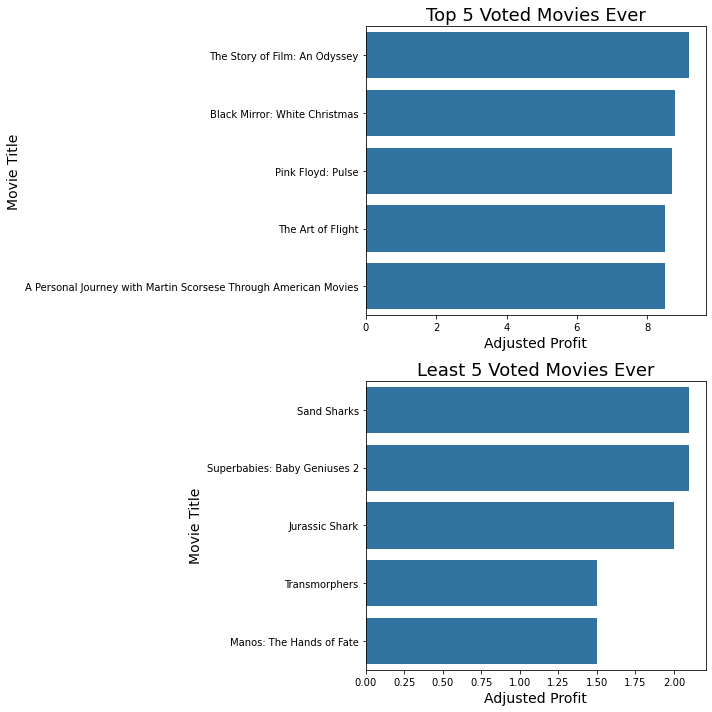

In [57]:
## determine the top 5 and least 5 movies with average votes

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 10))

sns.barplot(x = 'vote_average', y = 'original_title', data = df.sort_values(by = 'vote_average', ascending = False).head(5), color = base_color, ax = ax1)
ax1.set_title('Top 5 Voted Movies Ever', fontsize=18)
ax1.set_xlabel('Adjusted Profit', fontsize=14)
ax1.set_ylabel('Movie Title', fontsize=14);


sns.barplot(x = 'vote_average', y = 'original_title', data = df.sort_values(by = 'vote_average', ascending = False).tail(5), color = base_color, ax = ax2)
ax2.set_title('Least 5 Voted Movies Ever', fontsize=18)
ax2.set_xlabel('Adjusted Profit', fontsize=14)
ax2.set_ylabel('Movie Title', fontsize=14);

fig.tight_layout()

>The plots above show that none of the movies with the top 5 and least 5 average votes had their votes due to their profits made or losses incurred respectively

#### Show the average votes of the best and worst movies

In [58]:
best_movie = df[df['original_title'] == 'Star Wars']
print('The best movie, {} had an average vote of {}'.format(best_movie['original_title'].iloc[0], best_movie['vote_average'].iloc[0]))

The best movie, Star Wars had an average vote of 7.9


In [59]:
worst_movie = df[df['original_title'] == "The Warrior's Way"]
print('The worst movie, {} had an average vote of {}'.format(worst_movie['original_title'].iloc[0], worst_movie['vote_average'].iloc[0]))

The worst movie, The Warrior's Way had an average vote of 6.4


>The above statements show that the average vote of the most profitable movie was high, but it was not the highest vote. Also the average vote of the least profitable movie was actually not too bad

<a id='conclusion'></a>
# Conclusion

## Research Question 1 Conclusion

> ### The Adventure genre seems to be the most enjoyable genre by viewers, based on its high profitability and average count

> ### However, the Foreign and TV Movies genres are generally not profitable and likable genres

## Research Question 2 Conclusion

> ### Based on having the highest revenues, profits and average votes over the years while having the lowest budget used in producing movies, an assumption can be made that the movies made in the 1970s have had the best quality over the decades

## Research Question 3 Conclusion

> ### The Drama genre is the most popular genre, based on its historical popularity

## Research Question 4 Conclusion

> ### The charts show that the 5 movies with the highest and least profits each are not in the top 5 and least 5 movies based on average votes.

> ### They also show that movies having the highest or lowest profits do not mean they were the best or worst movies seen by the viewers respectively

<a id='limitation'></a>
# Limitation

> ### A limitation to the exploration of the dataset is the lack of some information on the people who voted e.g., age, preferred genre, etc.

> ### Having the extra information would aid in analysisng the movies based on the age groups and genre taste of the viewers